# Цель лабораторной работы
Изучить способы предварительной обработки данных для&nbsp;дальнейшего формирования моделей<cite data-cite="ue:lab3"></cite>.

# Задание
Требуется<cite data-cite="ue:lab3"></cite>:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в&nbsp;данных. Для&nbsp;выполнения следующих пунктов можно использовать несколько различных наборов данных.
2. Для&nbsp;выбранного датасета (датасетов) на основе материалов [лекции](https://github.com/ugapanyuk/ml_course/blob/master/common/notebooks/missing/handling_missing_norm.ipynb) решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.

# Ход выполнения работы

Подключим все необходимые библиотеки и настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing

# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в&nbsp;дальнейшем текст в&nbsp;отчёте влезал на&nbsp;А4<cite data-cite="doc:pandas"></cite>:

In [ ]:
pd.set_option("display.width", 70)

Для&nbsp;выполнения данной лабораторной работы возьмём набор данных по персонажам Marvel Comics

In [4]:
data = pd.read_csv("marvel-data.csv")

Посмотрим на&nbsp;эти наборы данных:

In [5]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [6]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [7]:
data.shape

(16376, 13)

## Обработка пропусков в&nbsp;данных

Найдем все пропуски в&nbsp;данных:

In [8]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

уберем часть строк, чтобы избавиться от единичных случаев

In [40]:
data = data.drop(np.where(data['APPEARANCES'] > 50)[0])

Очевидно, что мы будем работать с&nbsp;колонкой `APPEARANCES`.

Самый простой вариант — заполнить пропуски нулями:

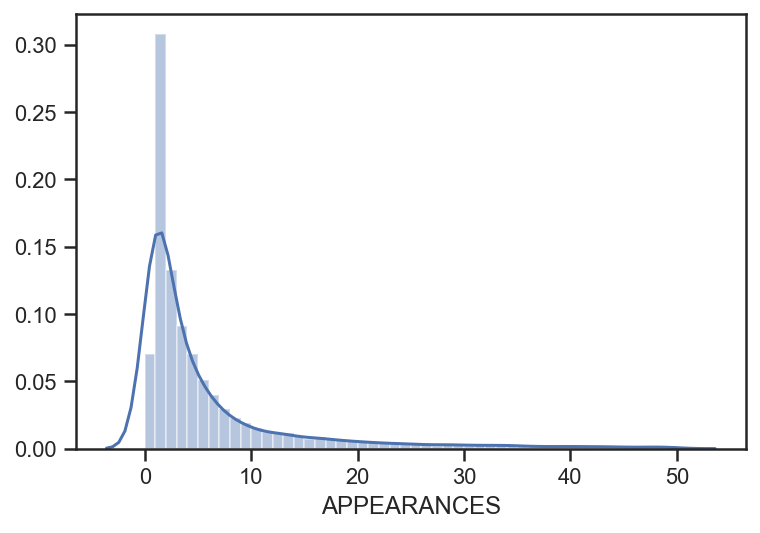

In [21]:
sns.distplot(data["APPEARANCES"].fillna(0));

Это работает, но логичнее было бы персонажам без информации присваивать среднее число появлений:

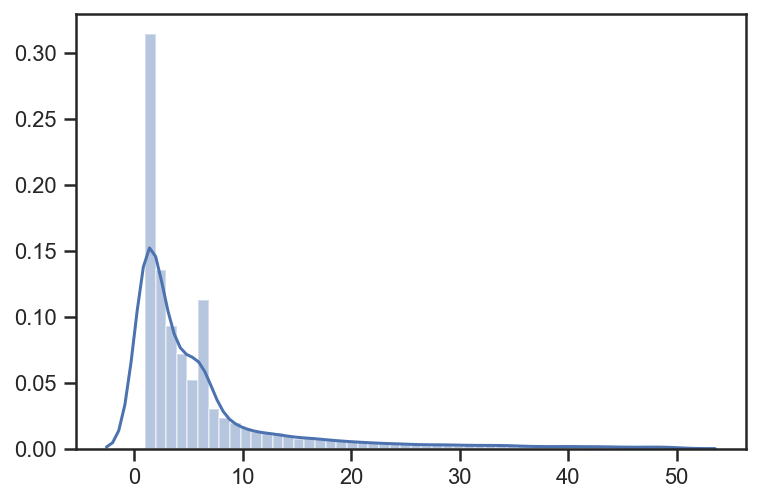

In [18]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_rat = mean_imp.fit_transform(data[["APPEARANCES"]])
sns.distplot(mean_rat);

Попробуем также медианное значение и самое частое значение:

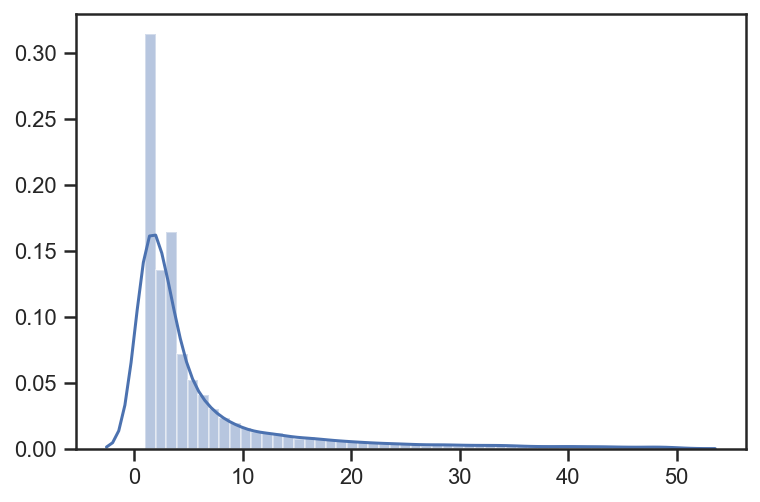

In [22]:
med_imp = sklearn.impute.SimpleImputer(strategy="median")
med_rat = med_imp.fit_transform(data[["APPEARANCES"]])
sns.distplot(med_rat);

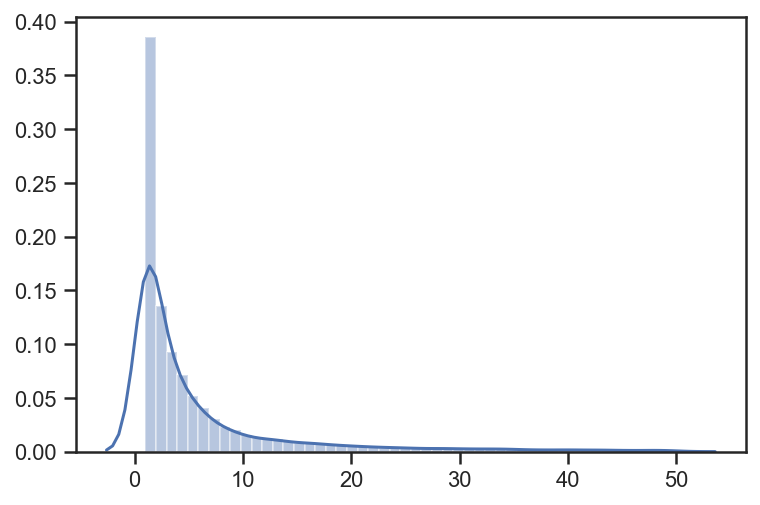

In [23]:
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rat = freq_imp.fit_transform(data[["APPEARANCES"]])
sns.distplot(freq_rat);

Видно, что самый близкий к&nbsp;нормальному распределению график заполнения нулями или самого частого значения. Остановимся на&nbsp;втором:

In [25]:
data["APPEARANCES"] = freq_rat

## Кодирование категориальных признаков

Рассмотрим колонку `ID`:

In [27]:
ids = data["ID"].dropna().astype(str)
ids.value_counts()

Secret Identity                  5912
Public Identity                  4307
No Dual Identity                 1649
Known to Authorities Identity      11
Name: ID, dtype: int64

Выполним кодирование категорий целочисленными значениями:

In [28]:
le = sklearn.preprocessing.LabelEncoder()
id_le = le.fit_transform(ids)
print(np.unique(id_le))
le.inverse_transform(np.unique(id_le))

[0 1 2 3]


array(['Known to Authorities Identity', 'No Dual Identity',
       'Public Identity', 'Secret Identity'], dtype=object)

Выполним кодирование категорий наборами бинарных значений:

In [29]:
id_oh = pd.get_dummies(ids)
id_oh.head()

,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity
735,0,0,1,0
736,0,0,0,1
737,0,0,0,1
738,0,0,1,0
739,0,0,1,0


In [30]:
id_oh[id_oh["No Dual Identity"] == 1].head()

,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity
740,0,1,0,0
743,0,1,0,0
761,0,1,0,0
763,0,1,0,0
774,0,1,0,0


## Масштабирование данных

Для&nbsp;начала попробуем обычное MinMax-масштабирование:

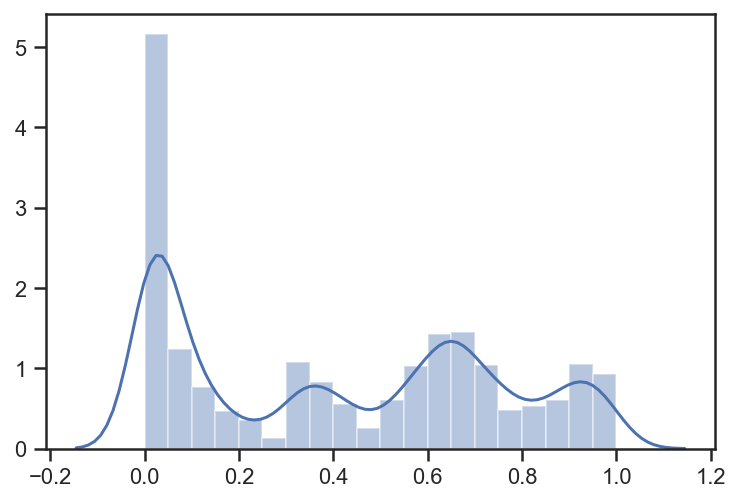

In [43]:
mm = sklearn.preprocessing.MinMaxScaler()
sns.distplot(mm.fit_transform(data[["page_id"]]));

Результат вполне ожидаемый и вполне приемлемый. Но попробуем и другие варианты, например, масштабирование на&nbsp;основе Z-оценки:

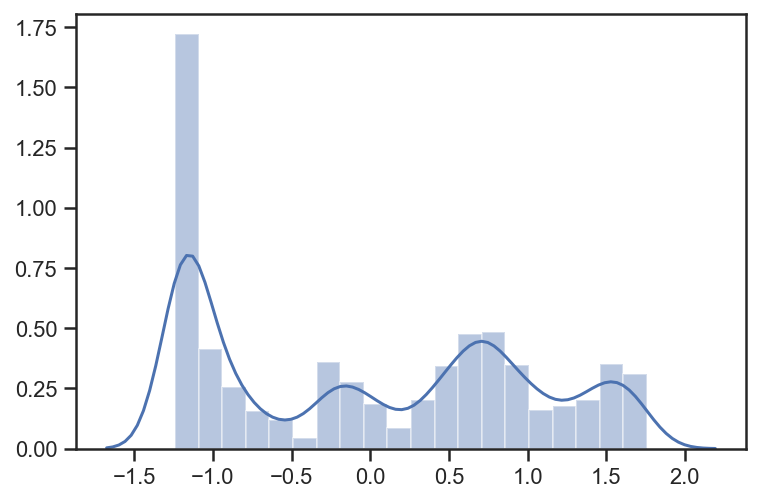

In [50]:
ss = sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["page_id"]]));

Также результат ожидаемый, но его применимость зависит от&nbsp;дальнейшего использования.